# CPSC 330 Lecture 21

Outline:

- 👋
- **Turn on recording**
- Announcements
- Confidence, credence, and `predict_proba` (20 min)
- Credence activity (20 min)
- Break (5 min)
- Visualization videos recap (10 min)
- Visualization activity (25 min)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

In [2]:
plt.rcParams['font.size'] = 16

## Announcements

- hw6 grades posted
- hw7 grading in progress
- hw8 deadline passed
- hw9 posted (last one!), due Monday 11:59pm

## Attribution

- The first part of this lecture is adapted from [DSCI 542](https://github.com/UBC-MDS/DSCI_542_comm-arg), created by [David Laing](https://davidklaing.com/).
- The visualization component of this lecture benefitted from discussions with [Firas Moosvi](http://firas.moosvi.com/) about his course, [DSCI 531](https://github.com/UBC-MDS/DSCI_531_viz-1).

## Confidence and `predict_proba` (20 min)

- What does it mean to be "confident" in your results?
- When you perform analysis, you are responsible for many judgment calls.
- [Your results will be different than others'](https://fivethirtyeight.com/features/science-isnt-broken/#part1).
- As you make these judgments and start to form conclusions, how can you recognize your own uncertainties about the data so that you can communicate confidently?

#### What does this mean for us, when we're trying to make claims about our data?

Let's imagine that the following claim is true:

> Vancouver has the highest cost of living of all cities in Canada.

Now let's consider a few beliefs we could hold:

1. Vancouver has the highest cost of living of all cities in Canada. **I am 95% sure of this.** 
2. Vancouver has the highest cost of living of all cities in Canada. **I am 55% sure of this.** 

The part is bold is called a [credence](https://en.wikipedia.org/wiki/Credence_(statistics)). Which belief is better?

But what if it's actually Toronto that has the highest cost of living in Canada?

1. Vancouver has the highest cost of living of all cities in Canada. **I am 95% sure of this.** 
2. Vancouver has the highest cost of living of all cities in Canada. **I am 55% sure of this.** 

Which belief is better now?
<br><br><br><br><br><br>
Conclusion: We don't just want to be right. We want to be confident when we're right and hesitant when we're wrong.

#### What do credences mean in practical terms?

One of two things:

* **I would accept a bet at these odds.** 99% sure means, "For the chance of winning \\$1, I would bet \\$99 that I'm right about this." 75% sure means, "For the chance of winning \\$25, I would bet \\$75 that I'm right about this."
* **Long-run frequency of correctness.** 99% sure means, "For every 100 predictions I make at this level of confidence, I would expect only 1 of them to be incorrect." 75% sure means, "For every 100 predictions I make at this level of confidence, I would expect about 25 of them to be incorrect."

#### It's easy enough to evaluate how good we are at being right...

But if we want to evaluate *how good we are at knowing how right we are*?

We would need to keep of not just the correctness of our predictions, but also our confidence in those predictions.


#### What does this have to do with applied ML?

- What if you `predict` that a credit card transaction is fraudulent?
  - We probably want `predict_proba` a lot of the time.
- What if `predict_proba` is 0.95 in that case?
  - How confident are YOU?
- What if you forecast that avocado prices will go up next week? 
  - How confident are you there?
- Or what if you predict a house price to be \\$800k? 
  - That is not even a true/false statement.

#### Loss functions

When you call `fit` for `LogisticRegression` it has these same preferences: correct and confident > correct and hesitant > incorrect and hesitant > incorrect and confident.

In [3]:
from sklearn.metrics import log_loss

- This is a "loss" or "error" function like mean squared error, so lower values are better.
- When you call `fit` it tries to minimize this metric.

Correct and 95% confident:

In [4]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.95, 0.05]]), labels=(0,1))

0.05129329438755058

Correct and 55% confident:

In [5]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.55, 0.45]]), labels=(0,1))

0.5978370007556204

Incorrect and 55% confident:

In [6]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.45, 0.55]]), labels=(0,1))

0.7985076962177716

Incorrect and 95% confident:

In [7]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.05, 0.95]]), labels=(0,1))

2.995732273553991

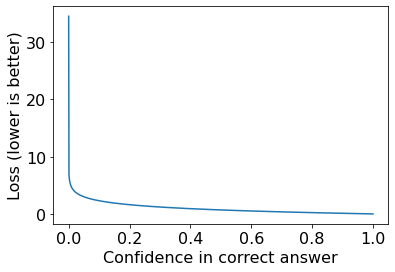

In [8]:
grid = np.linspace(0,1,1000)
plt.plot(grid, [log_loss(y_true=np.array([1]), y_pred=np.array([g]), labels=(0,1)) for g in grid]);
plt.xlabel("Confidence in correct answer");
plt.ylabel("Loss (lower is better)");

- Your loss goes to 0 as you approach 100% confidence in the correct answer.
- Your loss goes to infinity as you approach 100% confidence in the incorrect answer.
- (optional) See also the very related [How to assign partial credit on an exam of true-false questions?](https://terrytao.wordpress.com/2016/06/01/how-to-assign-partial-credit-on-an-exam-of-true-false-questions/)

The real `LogisticRegression` is averaging this score over all training examples.


Some nice examples: 

- [Scott Alexander](https://slatestarcodex.com/2019/01/22/2018-predictions-calibration-results/)
  - Look at how the plot starts at 50%. That is because being 40% confident of "X" is the same as being 60% confident of "not X".
- [Good Judgment Project](https://www.gjopen.com/)





## Credence Activity (20 min)

- Take a few minutes and assign credences or values to the claims below, in the Google Doc. Afterwards, we'll discuss.
- **Do not search the answers; the point of the exercise is to evaluate how good we are at guessing.** 
- Try not to be influenced by other peoples' answers! Better to pick your answers before going to the Google Doc.

1. I am __ % sure that the world's tallest building is between 200m and 800m tall. 
2. I am __ % sure that there are between 200 and 300 bones in an average adult human body. 
3. I am __ % sure that the planet Mars is bigger (diameter) than the planet Mercury. 
4. I am 99% sure that the world's tallest tree taller than __ m.
5. I am 90% sure that the world's tallest tree taller than __ m.
6. I am 50% sure that the world's tallest tree taller than __ m.

NOTE: 100% means you are completely sure the statement is true, 0% means you are completely sure the statement is false.

## Break (5 min)

## Visualizing your results (5 min)

Pre-viewing review from [Calling BS visualization videos](https://www.youtube.com/watch?v=T-5aLbNeGo0&list=PLPnZfvKID1Sje5jWxt-4CSZD7bUI4gSPS&index=30&t=0s):

- Dataviz in the popular media.
  - e.g. [modern NYT](https://youtu.be/T-5aLbNeGo0?t=367)
- Misleading axes.
  - e.g. [vaccines](https://youtu.be/9pNWVMxaFuM?t=299)
- Manipulating bin sizes.
  - e.g. [tax dollars](https://youtu.be/zAg1wsYfwsM?t=196)
- Dataviz ducks.
  - e.g. [drinking water](https://youtu.be/rmii1hfP6d4?t=169)
  - "look how clever we are about design" -> making it about me instead of about you (see last class)
- Glass slippers.
  - e.g. [internet marketing tree](https://youtu.be/59teS0SUHtI?t=285)
- The principle of proportional ink.
  - e.g. [most read books](https://youtu.be/oNhusd3xFC4?t=147)

- [Demo of cleaning up a plot](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [Principle of proportional ink](https://serialmentor.com/dataviz/proportional-ink.html) from a viz textbook.

## Visualization activity (20 min)

- We'll load up the housing data as per usual.
- The housing data is not included in the course repo, here is a link: https://www.kaggle.com/c/home-data-for-ml-course/

In [39]:
housing_df = pd.read_csv("data/housing.csv", index_col=0)

housing_train, housing_test = train_test_split(housing_df, random_state=123)

X_train = housing_train.drop(columns=['SalePrice'])
y_train = housing_train['SalePrice']

X_test = housing_test.drop(columns=['SalePrice'])
y_test = housing_test['SalePrice']

In [40]:
numeric_features     = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                        'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                        'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
ordinal_features_reg = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
ordinal_features_oth = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                        'Functional',  'Fence']
categorical_features = list(set(X_train.columns) - set(numeric_features) - set(ordinal_features_reg))

ordering = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [41]:
numeric_preprocessing = make_pipeline(SimpleImputer(strategy='median'), 
                                      StandardScaler())
ordinal_preprocessing = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                      OrdinalEncoder(categories=[ordering]*len(ordinal_features_reg)))
categorical_preprocessing = make_pipeline(SimpleImputer(strategy='constant', fill_value="?"),
                                          OneHotEncoder(handle_unknown='ignore', sparse=False))

In [42]:
preprocessing = ColumnTransformer([
    ('numeric', numeric_preprocessing, numeric_features),
    ('ordinal', ordinal_preprocessing, ordinal_features_reg),
    ('categorical', categorical_preprocessing, categorical_features)
])

In [43]:
preprocessing.fit(X_train);

In [44]:
ohe_columns = list(preprocessing.named_transformers_['categorical'].named_steps['onehotencoder'].get_feature_names(categorical_features))
new_columns = numeric_features + ordinal_features_reg + ohe_columns

In [45]:
X_train_housing = pd.DataFrame(preprocessing.transform(X_train), index=X_train.index, columns=new_columns)
X_test_housing = pd.DataFrame(preprocessing.transform(X_test), index=X_test.index, columns=new_columns)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

Let's compare sklearn's `GradientBoostingRegressor` to `RandomForestRegressor` for different values of `n_estimators`.

In [47]:
n_estimators_values = [3, 10, 30, 100, 300]

In [48]:
score_rf_train = list()
score_rf_test = list()
score_gb_train = list()
score_gb_test = list()

for n_estimators in n_estimators_values:
    print(n_estimators)
    rf = TransformedTargetRegressor(
        RandomForestRegressor(n_estimators=n_estimators, random_state=123), 
        func=np.log1p, inverse_func=np.expm1)    
    rf.fit(X_train_housing, y_train)
    score_rf_train.append(rf.score(X_train_housing, y_train))
    score_rf_test.append(rf.score(X_test_housing, y_test))
    
    gb = TransformedTargetRegressor(
        GradientBoostingRegressor(n_estimators=n_estimators, random_state=123),
        func=np.log1p, inverse_func=np.expm1)
    gb.fit(X_train_housing, y_train)
    score_gb_train.append(gb.score(X_train_housing, y_train))
    score_gb_test.append(gb.score(X_test_housing, y_test))

3
10
30
100
300


Here is a low-quality plot that is confusing and perhaps downright misleading:

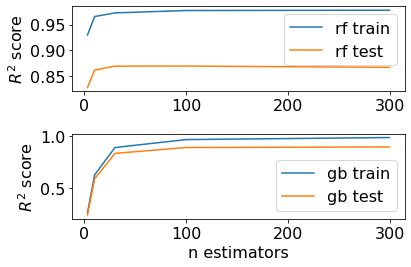

In [49]:
plt.subplot(2,1,1)
plt.plot(n_estimators_values, score_rf_train, label="rf train")
plt.plot(n_estimators_values, score_rf_test,  label="rf test")
plt.ylabel("$R^2$ score");
plt.legend();
plt.subplot(2,1,2)
plt.plot(n_estimators_values, score_gb_train, label="gb train")
plt.plot(n_estimators_values, score_gb_test,  label="gb test")
plt.xlabel("n estimators");
plt.ylabel("$R^2$ score");
plt.legend();
plt.tight_layout();

Your task is to do ONE (or more if you have time) of the following: 

- Create a visualization that makes RF look better than GB.
- Create a visualization that makes GB look better than RF.
- Create a visualization that makes RF and GB look equally good.

When you have a visualization, copy or screenshot it and paste it into the Google Doc.

Below are my plots made during the activity:

#### RF better than GB

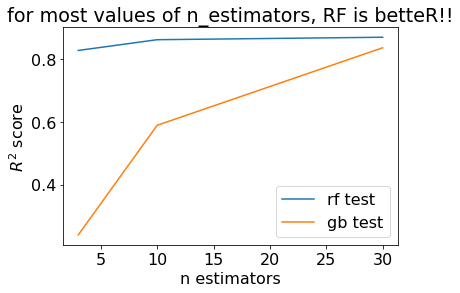

In [50]:
nmax = 3

# plt.plot(n_estimators_values[:nmax], score_rf_train[:nmax], label="rf train")
plt.plot(n_estimators_values[:nmax], score_rf_test[:nmax],  label="rf test")
# plt.plot(n_estimators_values[:nmax], score_gb_train[:nmax], label="gb train")
plt.plot(n_estimators_values[:nmax], score_gb_test[:nmax],  label="gb test")
plt.xlabel("n estimators");
plt.ylabel("$R^2$ score");
plt.legend();
plt.title("for most values of n_estimators, RF is betteR!!");

#### GB better than RF

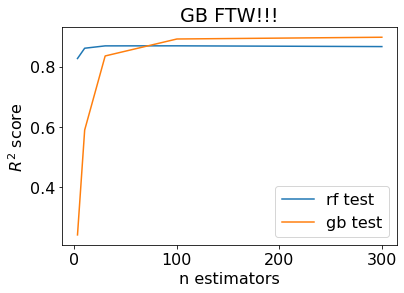

In [51]:
# plt.plot(n_estimators_values, score_rf_train, label="rf train")
plt.plot(n_estimators_values, score_rf_test,  label="rf test")
# plt.ylabel("$R^2$ score");
# plt.legend();
# plt.subplot(2,1,2)
# plt.plot(n_estimators_values, score_gb_train, label="gb train")
plt.plot(n_estimators_values, score_gb_test,  label="gb test")
plt.xlabel("n estimators");
plt.ylabel("$R^2$ score");
plt.legend();
plt.title("GB FTW!!!");

#### Equally good

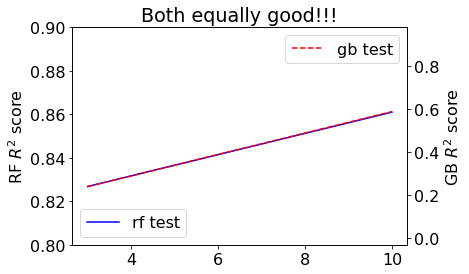

In [143]:
nmax = 2

# plt.plot(n_estimators_values, score_rf_train, label="rf train")
plt.plot(n_estimators_values[:nmax], score_rf_test[:nmax], 'b', label="rf test")
plt.ylabel("RF $R^2$ score");
plt.legend(loc="lower left");
plt.ylim((0.8, 0.9))
plt.twinx()
# plt.plot(n_estimators_values, score_gb_train, label="gb train")
plt.plot(n_estimators_values[:nmax], score_gb_test[:nmax], '--r', label="gb test")
plt.xlabel("n estimators");
plt.ylabel("GB $R^2$ score");
plt.legend();
plt.ylim((-0.03, 0.98))
plt.title("Both equally good!!!");